# Country Dataset

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('../Dataset/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
print('There are {} rows and {} columns in our dataset'.format(df.shape[0],df.shape[1]))

There are 167 rows and 10 columns in our dataset


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [12]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


Observations:

child_mort, exports, imports, income, inflation, gdpp - seems to have large difference between 75% percentile and max value. it looks like these features are right scewed.

## Define Clustering Target

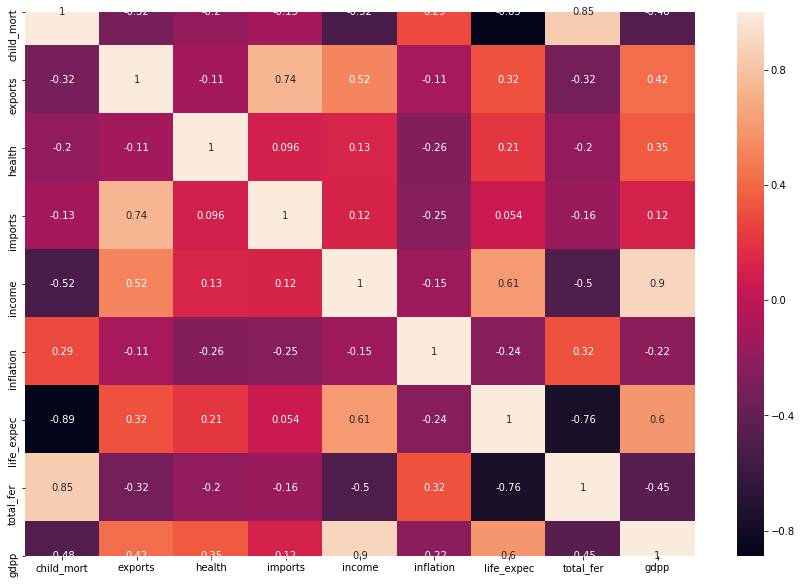

In [14]:
#Correlation

# pearson
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson', min_periods=1),annot=True)

From this heatmap, we can define the top 3 highest positive correlation score. We can do without these features:

gdpp and income with 0.9
total_fer and child_mort with 0.85
imports and exports with 0.74

In [25]:
X_numerics = df[['child_mort', 'imports', 'gdpp']]

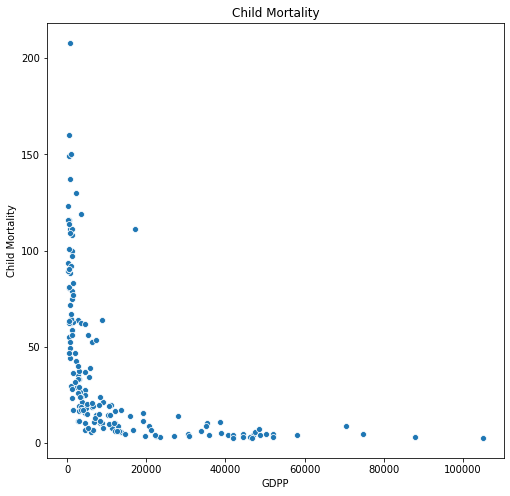

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = count_data)
plt.title('Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.show()

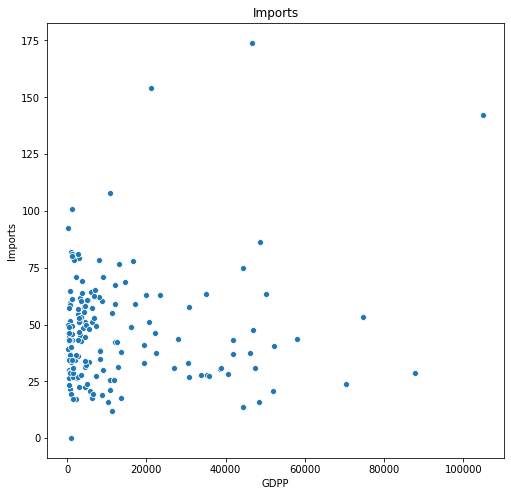

In [27]:
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'imports', data = count_data)
plt.title('Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

## K-Means Clustering

In [28]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [29]:
#Elbow Method
number_of_cluster = range(1,11)
clusterings = [KMeans(n_clusters = k).fit(count_data) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

D_k = [cdist(count_data, cent, 'euclidean') for cent in centroids] 
cIdx = [np.argmin(D, axis = 1) for D in D_k] 
dist = [np.min(D, axis = 1) for D in D_k] 
avg_withinSS = [sum(d)/count_data.shape[0] for d in dist]

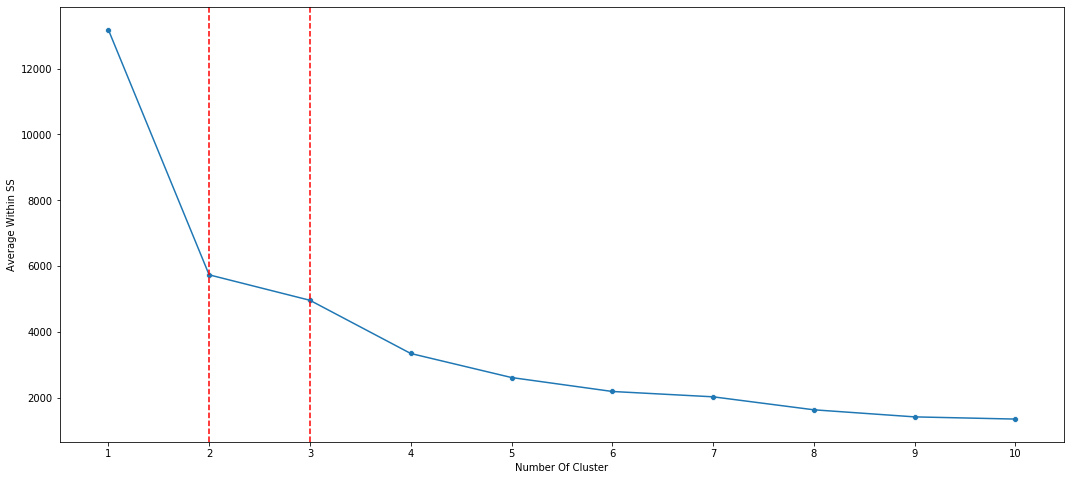

In [30]:
plt.figure(figsize=(18,8))
sns.lineplot(number_of_cluster, avg_withinSS)
sns.scatterplot(number_of_cluster, avg_withinSS)
plt.xticks(number_of_cluster)
plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within SS')
plt.axvline(2, ls="--", c="red")
plt.axvline(3, ls="--", c="red")
plt.show()

best n_clusters = 2

In [31]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(count_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(count_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7914622332755701
For n_clusters=3, the silhouette score is 0.7824059115238677
For n_clusters=4, the silhouette score is 0.6842125135896783
For n_clusters=5, the silhouette score is 0.640221956974283
For n_clusters=6, the silhouette score is 0.6370423909797381
For n_clusters=7, the silhouette score is 0.6371690535613439
For n_clusters=8, the silhouette score is 0.6057683027167667


In [33]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

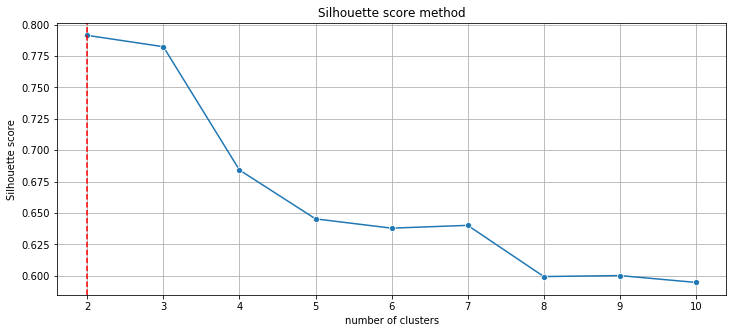

In [37]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()



### 2 Clusters

In [73]:
KM_2_clusters = KMeans(n_clusters=2, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM2_clustered = X_numerics.copy()
KM2_clustered.loc[:,'Cluster'] = KM_2_clusters.labels_ # append labels to points

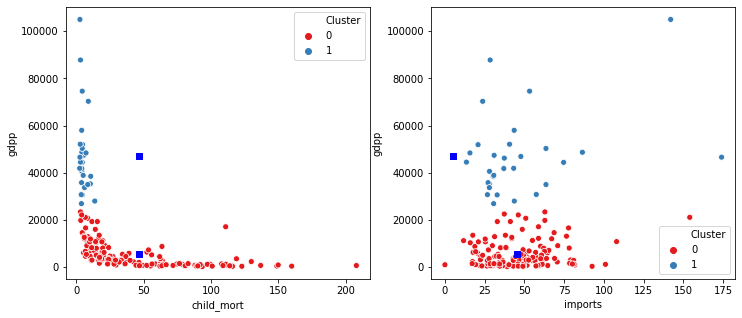

In [74]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('child_mort', 'gdpp', data=KM2_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('imports', 'gdpp', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_2_clusters.cluster_centers_[:,1],KM_2_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_2_clusters.cluster_centers_[:,0],KM_2_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [75]:
KM_clust_sizes = KM2_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,137
1,30


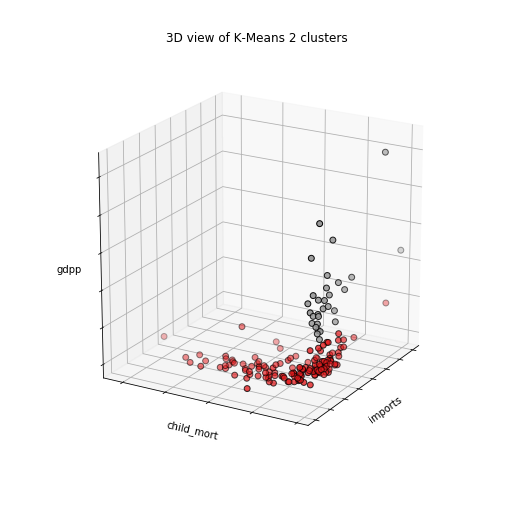

In [76]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM2_clustered['imports'],
           KM2_clustered['child_mort'],
           KM2_clustered['gdpp'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('imports')
ax.set_ylabel('child_mort')
ax.set_zlabel('gdpp')
ax.set_title('3D view of K-Means 2 clusters')
ax.dist = 12

plt.show()

In [85]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['imports'],
        y = db[db['Cluster']==n]['child_mort'],
        z = db[db['Cluster']==n]['gdpp'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')

data = [trace0, trace1]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'imports'),
            yaxis = dict(title = 'child_mort'),
            zaxis = dict(title = 'gdpp')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### 3 Clusters

In [78]:
KM_3_clusters = KMeans(n_clusters=3, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM3_clustered = X_numerics.copy()
KM3_clustered.loc[:,'Cluster'] = KM_3_clusters.labels_ # append labels to points

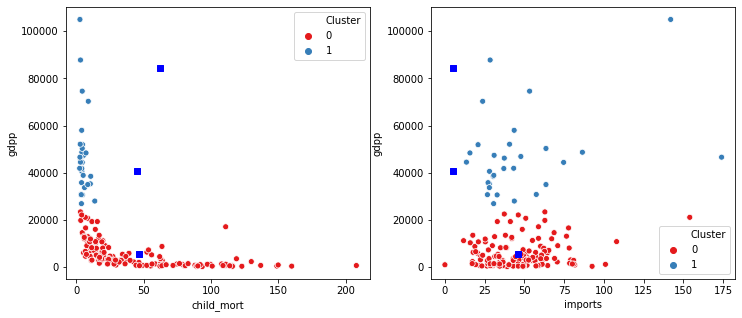

In [79]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('child_mort', 'gdpp', data=KM2_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('imports', 'gdpp', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_3_clusters.cluster_centers_[:,1],KM_3_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_3_clusters.cluster_centers_[:,0],KM_3_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [80]:
KM_clust_sizes = KM3_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,27
1,136
2,4


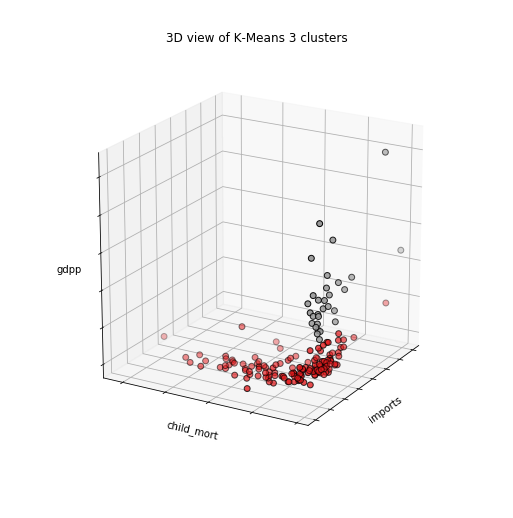

In [82]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM2_clustered['imports'],
           KM2_clustered['child_mort'],
           KM2_clustered['gdpp'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('imports')
ax.set_ylabel('child_mort')
ax.set_zlabel('gdpp')
ax.set_title('3D view of K-Means 3 clusters')
ax.dist = 12

plt.show()

In [88]:

# Plotly interactive 3D plot

trace0 = tracer(KM3_clustered, 0, 'Cluster 0')
trace1 = tracer(KM3_clustered, 1, 'Cluster 1')
trace2 = tracer(KM3_clustered, 2, 'Cluster 2')

data = [trace0, trace1, trace2]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'imports'),
            yaxis = dict(title = 'child_mort'),
            zaxis = dict(title = 'gdpp')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## DBSCAN

In [113]:
country_clust = X_numerics.copy()

In [114]:
scaler = StandardScaler()
country_clust_scaled = scaler.fit_transform(country_clust)

for eps in [i/10 for i in range(2,5)]:
    for min_samples in range (7,9):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(country_clust_scaled)
        score = silhouette_score(country_clust_scaled, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')


eps 0.2
\min samples 7
clusters present: [-1  0]
clusters sizes: [156  11]
Silhouette Score: -0.21529913756850436

eps 0.2
\min samples 8
clusters present: [-1  0]
clusters sizes: [156  11]
Silhouette Score: -0.21529913756850436

eps 0.3
\min samples 7
clusters present: [-1  0  1  2]
clusters sizes: [119  30  11   7]
Silhouette Score: -0.1361511565100906

eps 0.3
\min samples 8
clusters present: [-1  0  1]
clusters sizes: [130  29   8]
Silhouette Score: -0.1458651260536372

eps 0.4
\min samples 7
clusters present: [-1  0  1]
clusters sizes: [ 53 101  13]
Silhouette Score: 0.16269123987216677

eps 0.4
\min samples 8
clusters present: [-1  0  1  2]
clusters sizes: [70 78 11  8]
Silhouette Score: 0.08356780586915075


In [115]:
dbscan = DBSCAN(eps = 0.4, min_samples = 7)
labels = dbscan.fit_predict(country_clust_scaled)
country_clust['clustdbscan'] = labels

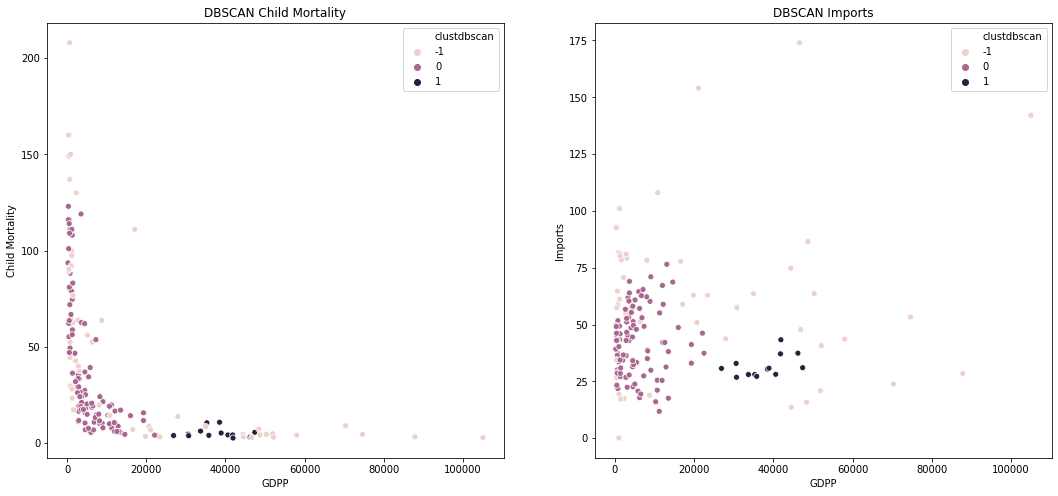

In [118]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = country_clust, hue = 'clustdbscan')
plt.legend(loc = 1)
plt.title('DBSCAN Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = country_clust, hue = 'clustdbscan')
plt.legend(loc = 1)
plt.title('DBSCAN Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

In [119]:
cluster_name = ['Cluster -1', 'Cluster 0', 'Cluster 1']
color = ['Blue', 'Orange', 'Green']
mortality = ['Noise', 'Low GDPP VS Low to Medium Imports', 'Medium GDPP VS Low Imports']
imports = ['Noise', 'Low GDPP VS Medium Imports', 'Medium GDPP VS Medium Imports']
dbscan_summary = pd.DataFrame({'Color': color, 'Name': cluster_name,
                        'Child Mortality': mortality, 'Imports': imports})
dbscan_summary

,Color,Name,Child Mortality,Imports
0,Blue,Cluster -1,Noise,Noise
1,Orange,Cluster 0,Low GDPP VS Low to Medium Imports,Low GDPP VS Medium Imports
2,Green,Cluster 1,Medium GDPP VS Low Imports,Medium GDPP VS Medium Imports
